# Proyecto 01 – Evaluación del primer trimestre
En este dataset se han recogido datos y mediciones de los ultimos dos años sobre los parametros a la hora de entrenar o competir en una carrera a pie por montaña/carretera.

# Problema a resolver.

El caso que tenemos que resolver es un problema de clasificación sobre el esfuerzo de de la persona a partir de los datos obtenidos de las carreras que ha realizado.Todos estos datos son parte de una serie de variables que tienen totalmente que ver con el esfuerzo realizado cómo son:

1. **Tipo de actividad** : es el tipo de actividad a reaslizar ya sea trail running o carrera.

2. **Calorias**	: las calorías que has gastado en el tipo de actuvidad.

3. **Tiempo**	: el tiempo que ha tardado el realizar la actuvidad.

4. **Frecuencia cardiaca media**: la frecuencia media cardiaca durante la carrera.

5. **TE aerobico** : es un indicador que mide el efecto de un entrenamiento en la mejora de la capacidad aeróbica

6. **Cadencia de carrera media** : muestra los pasos por minuto (ppm) de la carrera.

7. **Ritmo medio**	: la media del ritmo que llevaba en la actividad.

8. **Ascenso total** :	ascenso total durante la carrera.

9. **Descenso total**	: descenso total durante la carrera.

10. **Longitud media de zancada** : longitud media de la zancada durante el periodo que va corriendo.

11. **Temperatura minima** : temperatura mínima del cuerpo.	

12. **Temperatura maxima** : temperatura máxima del cuerpo.		

13. **Altura minima**	:	altura mínima alcanzada.

14. **Altura maxima** : altura máxima alcanzada.

A partir de estas variables tendremos que revisar los datos, ver cuales van a ser nuestras variables finales para entrenar el modelo y ver cuál es más preciso, escoger el que mejor precisión tenga y por último exportarlo.

# Exportación del fichero CSV
El primer paso va a ser exportar el fichero csv.

In [ ]:
# carga de datos
import io
from google.colab import files
import pandas as pd
# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns

def upload_files ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')),sep=";")
    return df

 # subimos el fichero
#asignamos el csv a la variable
df = upload_files()
df

Saving Activities_limpio.csv to Activities_limpio.csv
User uploaded file "Activities_limpio.csv" with length 12585 bytes


,Tipo de actividad,Distancia,Calorias,Tiempo,Frecuencia cardiaca media,TE aerobico,Cadencia de carrera media,Ritmo medio,Ascenso total,Descenso total,Longitud media de zancada,Temperatura minima,Temperatura maxima,Altura minima,Altura maxima
0,Trail running,21.48,"1,802",2:40:36,147,3.2,137,7:28,991,999,0.97,19.0,26.0,372,837
1,Carrera,8.46,673,0:47:09,156,3.3,165,5:34,93,103,1.07,20.0,28.0,474,522
2,Trail running,11.11,"1,044",1:08:56,160,4.0,160,6:12,322,326,1.00,19.0,28.0,366,553
3,Trail running,8.02,810,1:03:47,149,3.1,138,7:57,425,425,0.91,20.0,27.0,544,790
4,Trail running,12.08,"1,007",1:28:49,144,2.6,148,7:21,345,345,0.92,20.0,26.0,414,531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Carrera,5.01,417,0:27:44,162,3.5,175,5:32,61,70,1.03,23.0,26.0,518,568
154,Carrera,6.30,487,0:38:16,148,2.8,174,6:04,126,119,0.95,20.0,25.0,523,628
155,Carrera,5.01,364,0:27:06,151,3.1,175,5:25,65,79,1.06,19.0,26.0,517,567
156,Carrera,10.01,825,0:58:45,160,3.8,173,5:52,176,181,0.98,19.0,25.0,520,623


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tipo de actividad          158 non-null    object 
 1   Distancia                  158 non-null    float64
 2   Calorias                   158 non-null    object 
 3   Tiempo                     158 non-null    object 
 4   Frecuencia cardiaca media  158 non-null    int64  
 5   TE aerobico                158 non-null    object 
 6   Cadencia de carrera media  158 non-null    int64  
 7   Ritmo medio                158 non-null    object 
 8   Ascenso total              158 non-null    object 
 9   Descenso total             158 non-null    object 
 10  Longitud media de zancada  158 non-null    float64
 11  Temperatura minima         158 non-null    float64
 12  Temperatura maxima         158 non-null    float64
 13  Altura minima              158 non-null    int64  

# **Limpieza de datos**

Eliminamos todas las filas que contengan valores nulos.


In [ ]:
df = df.dropna()
df

,Tipo de actividad,Distancia,Calorias,Tiempo,Frecuencia cardiaca media,TE aerobico,Cadencia de carrera media,Ritmo medio,Ascenso total,Descenso total,Longitud media de zancada,Temperatura minima,Temperatura maxima,Altura minima,Altura maxima
0,Trail running,21.48,"1,802",2:40:36,147,3.2,137,7:28,991,999,0.97,19.0,26.0,372,837
1,Carrera,8.46,673,0:47:09,156,3.3,165,5:34,93,103,1.07,20.0,28.0,474,522
2,Trail running,11.11,"1,044",1:08:56,160,4.0,160,6:12,322,326,1.00,19.0,28.0,366,553
3,Trail running,8.02,810,1:03:47,149,3.1,138,7:57,425,425,0.91,20.0,27.0,544,790
4,Trail running,12.08,"1,007",1:28:49,144,2.6,148,7:21,345,345,0.92,20.0,26.0,414,531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Carrera,5.01,417,0:27:44,162,3.5,175,5:32,61,70,1.03,23.0,26.0,518,568
154,Carrera,6.30,487,0:38:16,148,2.8,174,6:04,126,119,0.95,20.0,25.0,523,628
155,Carrera,5.01,364,0:27:06,151,3.1,175,5:25,65,79,1.06,19.0,26.0,517,567
156,Carrera,10.01,825,0:58:45,160,3.8,173,5:52,176,181,0.98,19.0,25.0,520,623


# Creación de la columna Esfuerzo

Creamos tal columna para catalogar la frecuencia media cardiaca, la cuál nos servirá para el problema de clasificación y se va a rellenar a partir del siguiente formato.

Nombre Intervalo
Calentamiento --> De 100 a 138
Suave  ---> De 139 a 154
Aeróbico  ---> De 155 a 164
Umbral  --->De 165 a 173
Máximo ---> Mayor de 173

In [ ]:
df.insert(15, "Esfuerzo", 0, allow_duplicates=False)
for i,k in enumerate(df['Frecuencia cardiaca media']):
  if k <=138 and k >=100 :
    df['Esfuerzo'][i] = 'Calentamiento' 
  elif k <=154 and k >=139 :
    df['Esfuerzo'][i] = 'Suave'
  elif k <=164 and k >=155 :
    df['Esfuerzo'][i] = 'Aerobico' 
  elif k <=173 and k >=165 :
    df['Esfuerzo'][i] = 'Umbral'
  else :
    df['Esfuerzo'][i] = 'Maximo'   

<ipython-input-4-00cd8250f5ec>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Esfuerzo'][i] = 'Suave'
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


# **Transformación de tipos de datos y de categoricos a enteros**

Transformamos casi todas las columnas de valor categórico a númerico para poder usar todas las variables y realizar una estadística mediante la matriz de correlación.

In [ ]:
# pasamos de categórico a numérico el tipo de carreras además de las otras variables.
df['Tipo de actividad'].replace(['Trail running', 'Carrera'],[0, 1], inplace=True)

#transformar de horas a segundos el tiempo
df['Tiempo'] = pd.to_timedelta(df['Tiempo'])
df['Tiempo'] = df['Tiempo'].dt.total_seconds()
df['Tiempo'] = df['Tiempo'].astype('int')

df['Calorias'] = df['Calorias'].str.replace(',', '')
df['Calorias'] = pd.to_numeric(df['Calorias'], errors='coerce')

df['Ritmo medio'] = df['Ritmo medio'].str.split(':').apply(lambda x: int(x[0])*60+int(x[1]))
df['Ritmo medio'] = df['Ritmo medio'].astype(int)

df['Temperatura maxima'] = df['Temperatura maxima'].astype(int)
df['Temperatura minima'] = df['Temperatura minima'].astype(int)

df['Ascenso total'] = df['Ascenso total'].str.replace(',', '')
df['Ascenso total'] = df['Ascenso total'].replace('--', 0)
df['Ascenso total'] = pd.to_numeric(df['Ascenso total'], errors='coerce')

df['Descenso total'] = df['Descenso total'].str.replace(',', '')
df['Descenso total'] = df['Descenso total'].replace('--', 0)
df['Descenso total'] = pd.to_numeric(df['Descenso total'], errors='coerce')

df['Longitud media de zancada'] = df['Longitud media de zancada'].astype('int')
df['Distancia'] = df['Distancia'].astype('int')*1000

for i,k in enumerate(df['TE aerobico']):
  if k == '--':
    df.drop(i,axis=0,inplace=True)
df['TE aerobico'] = pd.to_numeric(df['TE aerobico'])

df['Esfuerzo'].replace(['Calentamiento','Suave', 'Aerobico', 'Umbral','Maximo'  ],[0,1,2,3,4], inplace=True)
df.reset_index(drop=True,inplace = True)

for j,v in enumerate(df['Altura maxima']):
  if v == 1:
    df.drop(j,axis=0,inplace=True)
df.reset_index(drop=True,inplace = True)

In [ ]:
df.dtypes

Tipo de actividad              int64
Distancia                      int64
Calorias                       int64
Tiempo                         int64
Frecuencia cardiaca media      int64
TE aerobico                  float64
Cadencia de carrera media      int64
Ritmo medio                    int64
Ascenso total                  int64
Descenso total                 int64
Longitud media de zancada      int64
Temperatura minima             int64
Temperatura maxima             int64
Altura minima                  int64
Altura maxima                  int64
Esfuerzo                       int64
dtype: object

# **Vista de los datos**

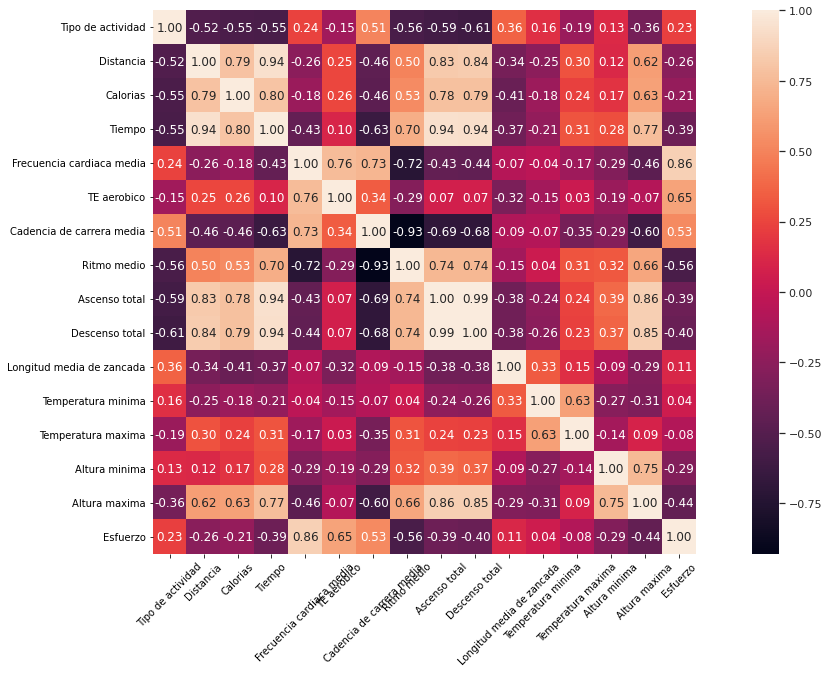

In [ ]:
#dibujo la matriz de correlación
fig,ax = plt.subplots(figsize=(20,10))

sns.set()
sns.heatmap(df.corr(), square=True, annot=True, fmt=".2f")
ax.set_xticklabels(labels= df.columns.values, rotation = 45, horizontalalignment='center')
plt.show()

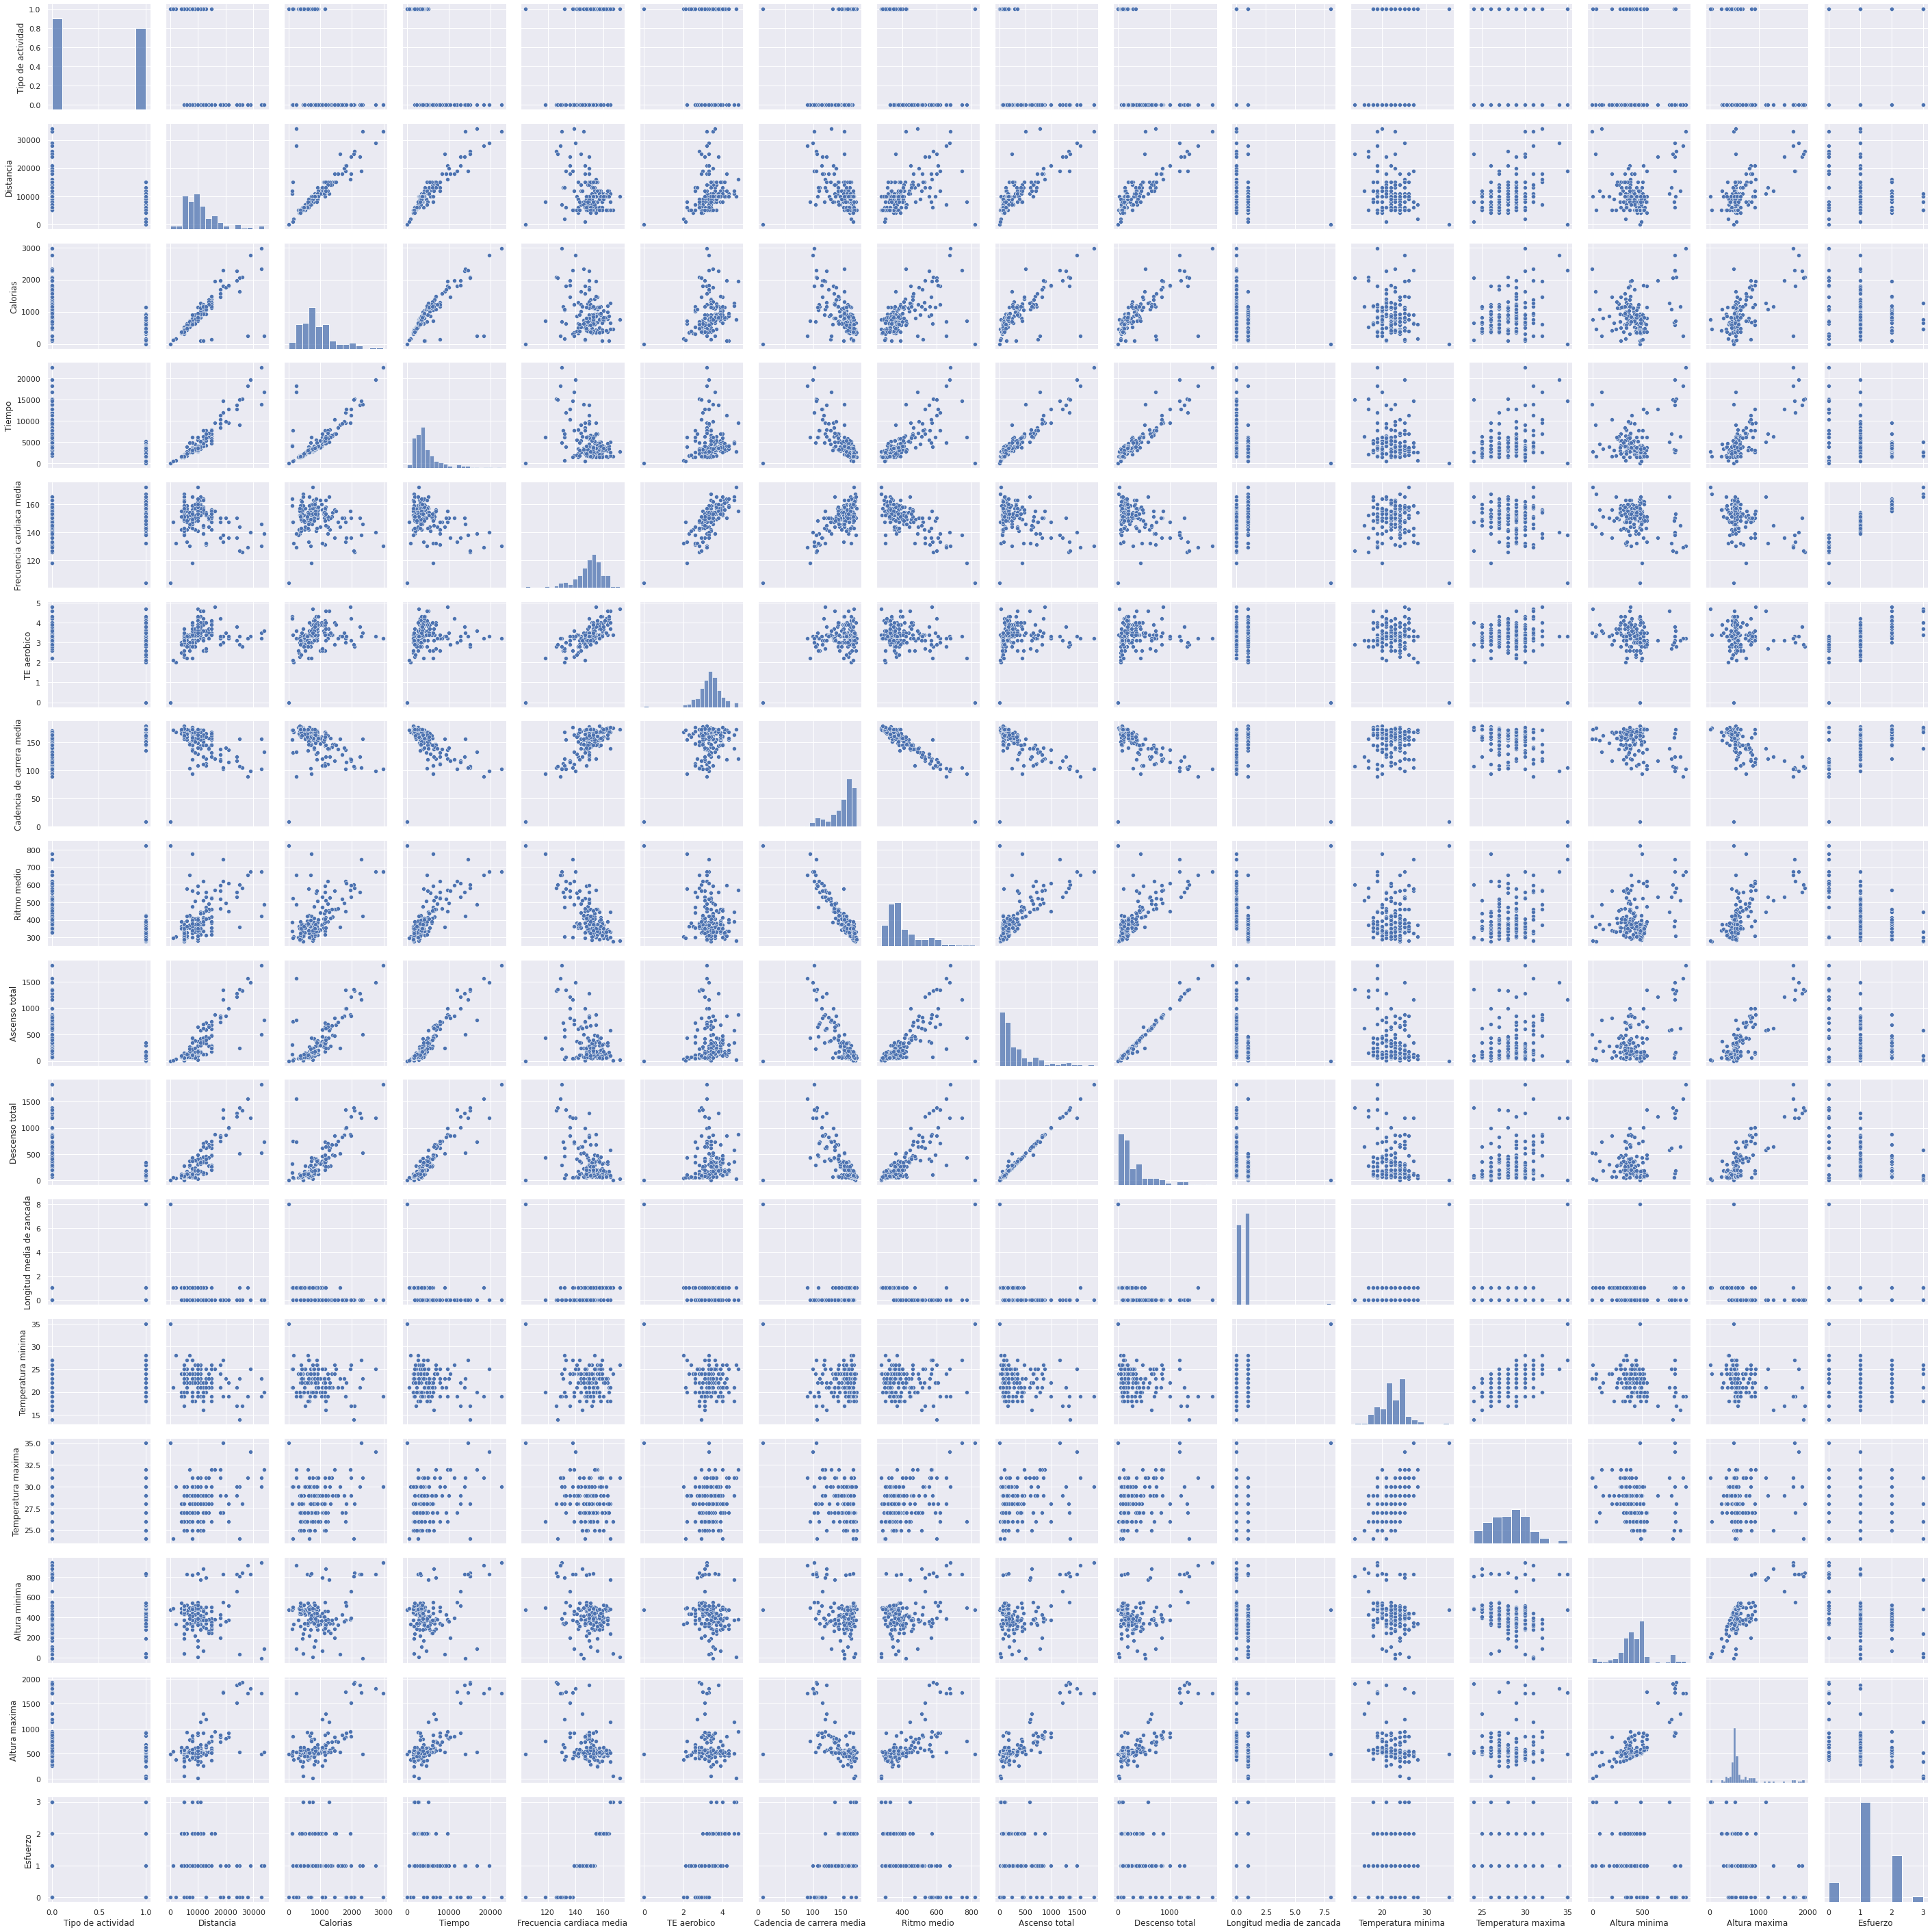

In [ ]:
sns.pairplot(df)

# Columnas que voy a eliminar para entrenar el modelo.

Viendo en la matriz de correlación como las temperaturas, las alturas y los ascensos y descensos totales tienen correlación entre ellas y no hya mucha diferencia he decidido crear 2 nuevas columnas temperatura media y altura media la cuales me van a dar una media de ambos valores y será más preciso.

In [ ]:
import statistics as stats

df.insert(16, "Temperatura media", 0, allow_duplicates=False)
df.insert(17, "Altura media", 0, allow_duplicates=False)

for i,k in enumerate(df['Temperatura minima']):
  df['Altura media'][i] = stats.mean([df['Altura minima'][i],df['Altura maxima'][i]])
  df['Temperatura media'][i] = stats.mean([k,df['Temperatura maxima'][i]])

df

<ipython-input-9-e0c54b0da6b8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Altura media'][i] = stats.mean([df['Altura minima'][i],df['Altura maxima'][i]])
<ipython-input-9-e0c54b0da6b8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Temperatura media'][i] = stats.mean([k,df['Temperatura maxima'][i]])


,Tipo de actividad,Distancia,Calorias,Tiempo,Frecuencia cardiaca media,TE aerobico,Cadencia de carrera media,Ritmo medio,Ascenso total,Descenso total,Longitud media de zancada,Temperatura minima,Temperatura maxima,Altura minima,Altura maxima,Esfuerzo,Temperatura media,Altura media
0,0,21000,1802,9636,147,3.2,137,448,991,999,0,19,26,372,837,1,22,604
1,1,8000,673,2829,156,3.3,165,334,93,103,1,20,28,474,522,2,24,498
2,0,11000,1044,4136,160,4.0,160,372,322,326,1,19,28,366,553,2,23,459
3,0,8000,810,3827,149,3.1,138,477,425,425,0,20,27,544,790,1,23,667
4,0,12000,1007,5329,144,2.6,148,441,345,345,0,20,26,414,531,1,23,472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,5000,417,1664,162,3.5,175,332,61,70,1,23,26,518,568,2,24,543
151,1,6000,487,2296,148,2.8,174,364,126,119,0,20,25,523,628,1,22,575
152,1,5000,364,1626,151,3.1,175,325,65,79,1,19,26,517,567,1,22,542
153,1,10000,825,3525,160,3.8,173,352,176,181,0,19,25,520,623,2,22,571


In [ ]:
df.drop(['Temperatura maxima','Temperatura minima','Altura maxima','Altura minima','Descenso total','Ascenso total'],axis = 1, inplace = True)

In [ ]:
df.describe()

,Tipo de actividad,Distancia,Calorias,Tiempo,Frecuencia cardiaca media,TE aerobico,Cadencia de carrera media,Ritmo medio,Longitud media de zancada,Esfuerzo,Temperatura media,Altura media
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,0.470968,10903.225806,894.677419,4880.967742,149.909677,3.352903,151.974194,409.851613,0.580645,1.219355,25.083871,529.600000
std,0.500774,6073.974921,522.453837,3842.798703,9.772322,0.574491,24.272251,106.328747,0.780201,0.686332,2.230121,235.026155
min,0.000000,0.000000,1.000000,9.000000,104.000000,0.000000,8.000000,278.000000,0.000000,0.000000,19.000000,9.000000
25%,0.000000,7000.000000,555.500000,2693.000000,146.500000,3.100000,143.000000,338.000000,0.000000,1.000000,24.000000,424.000000
50%,0.000000,10000.000000,802.000000,3670.000000,151.000000,3.400000,160.000000,376.000000,1.000000,1.000000,25.000000,491.000000
75%,1.000000,13000.000000,1145.000000,5717.500000,156.000000,3.700000,169.000000,450.500000,1.000000,2.000000,26.500000,537.500000
max,1.000000,34000.000000,2978.000000,22570.000000,172.000000,4.800000,179.000000,823.000000,8.000000,3.000000,35.000000,1385.000000


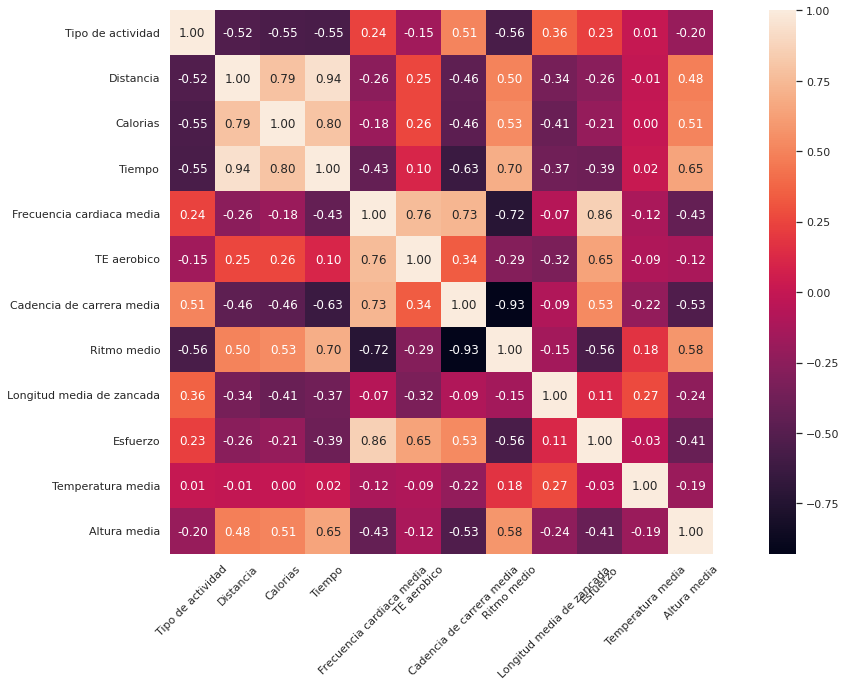

In [ ]:
fig,ax = plt.subplots(figsize=(20,10))

sns.set()
sns.heatmap(df.corr(), square=True, annot=True, fmt=".2f")
ax.set_xticklabels(labels= df.columns.values, rotation = 45, horizontalalignment='center')
plt.show()

Finalmente vamos a usar las variables que se muestran en la matriz de correlación, dónde aparecen el tipo de actividad,la distancia, las calorías, el tiempo, la frecuencia cardíaca media,... y sobre todo las medias de las columnas de alturas y temperaturas y el ritmo medio que equivale a la media entre el descenso total y el ascenso total.

# **Entrenamiento de modelos de Naive Bayes**

**1. Separación de datos.**

In [ ]:
from sklearn.model_selection import train_test_split
#pasamos datos de entrada y salida, además de eliminar la columna de nombres de coches del csv.

x_df = df.drop(['Esfuerzo'], axis=1)
y_df = df['Esfuerzo']
# separamos train y test 
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x_df, y_df, test_size=0.3, random_state=2)

**2. Modelos sin Cross Validation**

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB

# 2. preparamos 2 arrays, uno con los nombres y otro con las instancias de los modelos de naive bayes
names = ["GaussianNB", "MultiNomialNB", 'BernouilliNB', 'ComplementNB']
classifiers = [GaussianNB(), MultinomialNB(), BernoulliNB(), ComplementNB()]

# 3.recorremos con el bucle ambos arrays y creara otro con los resultados después de entrenarlos en este caso cfl
for name, clf in zip(names, classifiers):
  
  # entrenamos el modelo
  clf.fit(Xtrain, Ytrain)

  # hacemos una predicción y a partir de ella obtenemos la precisión de cada uno de los modelos
  score = clf.score(Xtest, Ytest) #Returns the mean accuracy on the given test data and labels.
  print ("Modelo: %s = %6.2f" % (name, score))

Modelo: GaussianNB =   0.00
Modelo: MultiNomialNB =   0.00
Modelo: BernouilliNB =   0.00
Modelo: ComplementNB =   0.00


Foto con las precisiones de los modelos en caso de no haber realizado las medias de las columnas y posteriormente haberlas borrado.

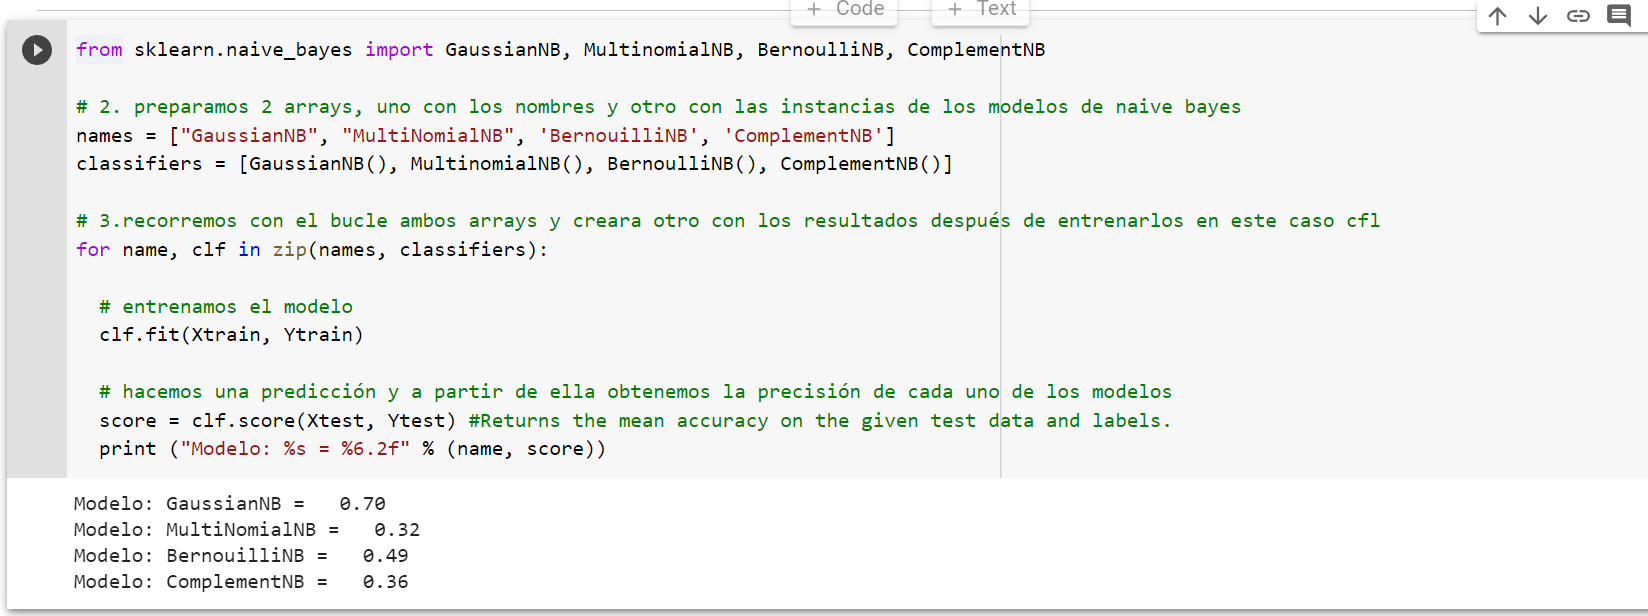

Podemos observar que no hay diferencia.

Mi conclusión es seguir el entrenamiento del modelo con las columnas de las medias de las columnas anteriormente eliminadas, ya que tampoco hay mucha pérdida, la cuál es debido a que hay menos datos para el entrenamiento y además considero que la de media de una temperatura máxima y una temperatura mínima te ayuda más para saber cuál es el esfuerzo que ha realizado la persona, desde mi punto de vista.

**3. Modelo con Cross Validation**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
cv = KFold(n_splits = 7, shuffle = True) # shuffle = False si hay dimensión temporal 
total_scores = []
for name, clf in zip(names, classifiers):
  fold_accuracy = []
  for train_fold, test_fold in cv.split(Xtrain):
    # División train test aleatoria
    f_train_x = Xtrain.iloc[train_fold]           # Extrae la información (iloc), atendiendo a los indices obtenidos por CrossValidation
    f_train_y = Ytrain.iloc[train_fold]
    # entrenamiento y ejeución del modelo
    clf.fit(f_train_x, f_train_y)
    # Realizamos la predicción (Final evaluation) y guardamos la precisión para calcular la media posteriormente
    y_pred = clf.predict(Xtrain.iloc[test_fold])
    # evaluación del modelo
    acc = accuracy_score(Ytrain.iloc[test_fold], y_pred)
    fold_accuracy.append(acc)
  total_scores.append(sum(fold_accuracy)/len(fold_accuracy))

for i in range(len(names)):
  print ("Modelo: %s = %6.2f" % (names[i], total_scores[i]))


Modelo: GaussianNB =   0.02
Modelo: MultiNomialNB =   0.00
Modelo: BernouilliNB =   0.00
Modelo: ComplementNB =   0.00


**Modelo KNN sin Cross Validation**

Visto que nuestro problema es de clasificación vamos a usar solo el modelo Classifier de KNN usando los parámetros K (vecinos) y w (pesos).


Primero calculamos los vecinos de cada uno de los pesos.

Min Value uniform : 84.23005319148936 (16)
Min Value distance : 77.83619323947738 (16)


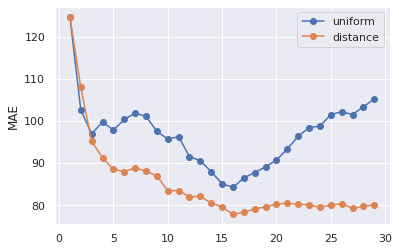

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np

cv = TimeSeriesSplit(n_splits = 5) #
Xtrain.reset_index(drop = True, inplace = True) # reinicia índice

for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,30):
       fold_accuracy = []
       knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
       # verificar cada uno de los modelos con validación cruzada.
       for train_fold, test_fold in cv.split(Xtrain):
          # División train test aleatoria
          f_train = Xtrain.loc[train_fold]
          f_test = Xtrain.loc[test_fold]
          # entrenamiento y ejecución del modelo
          knn.fit(Xtrain,Ytrain)
          y_pred_cv = knn.predict(Xtest)
          # evaluación del modelo
          mae = mean_absolute_error(Ytest, y_pred_cv)
          fold_accuracy.append(mae)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
   plt.plot(range(1,len(total_scores)+1), total_scores, 
             marker='o', label=weights)
   print ('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
   plt.ylabel('MAE')     

plt.legend()
plt.show() 



Entrenamos el modelo con el peso distance

In [ ]:
# 1. elegir classifier
from sklearn.neighbors import KNeighborsClassifier # Se utiliza este método porque es un problema de regresión

#Parámetros
k = 2 # Kneighbours o vecinos
w = "distance" # elijo uniform porque al recorrer lo vecinos más cercano devuelve mayor precisión

# 2. instanciar el modelo
knn_model = KNeighborsClassifier(k, weights=w)
# 3. entrenamiento con los datos
knn_model.fit(Xtrain , Ytrain)
# 4. predicción con nuevos datos y precisión
accuracy = knn_model.score(Xtest,Ytest)
accuracy

0.91435314080689

Entrenamos el modelo con el peso uniform

In [ ]:
# 1. elegir classifier
from sklearn.neighbors import KNeighborsClassifier # Se utiliza este método porque es un problema de regresión

#Parámetros
k = 2 # Kneighbours o vecinos
w = "uniform" # elijo uniform porque al recorrer lo vecinos más cercano devuelve mayor precisión

# 2. instanciar el modelo
knn_model = KNeighborsClassifier(k, weights=w)
# 3. entrenamiento con los datos
knn_model.fit(Xtrain , Ytrain)
# 4. predicción con nuevos datos y precisión
accuracy = knn_model.score(Xtest,Ytest)
accuracy

0.5319148936170213

**Modelo KNN con Cross Validation**

Con el peso uniform

In [ ]:
from sklearn.model_selection import cross_val_score

#params
k = 2
w = "uniform" 

# 2. instanciar el modelo
knn_model_CV = KNeighborsClassifier(k, weights=w)
# 3. entrenamiento con los datos
knn_model_CV.fit(Xtrain , Ytrain)
# 4. predicción con nuevos datos y precisión
scores = cross_val_score(knn_model_CV,Xtrain,Ytrain)
#para obtener la mayor precisión
scores.mean()

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


0.593073593073593

Con el peso distance

In [ ]:
from sklearn.model_selection import cross_val_score

#params
k = 2
w = "distance" 

# 2. instanciar el modelo
knn_model_CV = KNeighborsClassifier(k, weights=w)
# 3. entrenamiento con los datos
knn_model_CV.fit(Xtrain , Ytrain)
# 4. predicción con nuevos datos y precisión
scores = cross_val_score(knn_model_CV,Xtrain,Ytrain)
#para obtener la mayor precisión
scores.mean()

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


0.4818181818181818

# Método para dibujar la martriz de confusión

In [ ]:

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
# creamos el método que dibujará la matriz de confusión posteriormente

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          titleSup=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    fig.suptitle(titleSup, fontsize=16, y=1, ha='center')
    return ax

# Escogemos el modelo con mejor precisión, en este caso Gaussian.

Confusion matrix, without normalization
[[ 5  1  0  0]
 [ 0 15 12  0]
 [ 0  1 12  0]
 [ 0  0  0  1]]


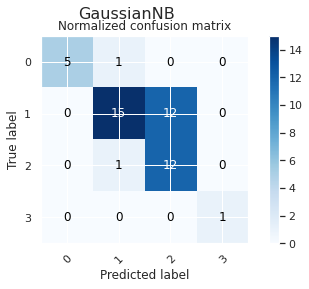

In [ ]:
from sklearn.metrics import accuracy_score

model = GaussianNB()

model.fit(Xtrain,Ytrain)

y_pred = model.predict(Xtest)

esfuerzo =  list(set(y_df))

plot_confusion_matrix(Ytest, y_pred, classes =unique_labels(esfuerzo), normalize=False,title='Normalized confusion matrix', titleSup='GaussianNB')

# **Exportar Modelo**
Exportamos el modelo al sistema de ficheros de google colab cómo fichero    .pkl

In [ ]:
#exportamos el modelo 
import sklearn.externals
import joblib
joblib.dump(model,'Modelo_entrenado_esfuerzo.pkl')


['Modelo_entrenado_esfuerzo.pkl']

# **Importar Modelo**
Importamos el modelo que anteriormente hemos exportado


In [ ]:
#importamos el modelo
model_imported = GaussianNB()
model_imported =  joblib.load('Modelo_entrenado_esfuerzo.pkl')
model_imported.score(Xtest,Ytest)

0.7021276595744681

# **obtener predicción y dibujar matriz de confusión del modelo importado**

Confusion matrix, without normalization
[[ 5  1  0  0]
 [ 0 15 12  0]
 [ 0  1 12  0]
 [ 0  0  0  1]]


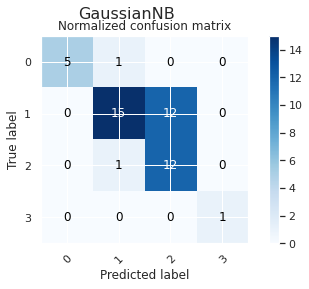

In [ ]:
#realizamos una predicción 
y_pred_imported =model_imported.predict(Xtest)

esfuerzo =  list(set(y_df))

#dibujo la matriz de confusión
plot_confusion_matrix(Ytest, y_pred_imported , classes =unique_labels(esfuerzo), normalize=False,title='Normalized confusion matrix', titleSup='GaussianNB')